In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt

# Bussiness Understanding

* User: Mr Cho (data scientist)
* Kebutuhan: Penjualan properti rumah di Bangaluru
* Tujuan: Memprediksi dan menentukan harga rumah yang tepat di Bangaluru.
* Penyelesaian: Bagaimana menganalisis data dengan menggunakan metode (CRISP-DM).

# Data Understanding

In [2]:
data = pd.read_csv("House_Data.csv")
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
# list columns index
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
# tipe data
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
# info keseluruhan data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
# Menghitung yang missing values
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
# menghitung persentasi mising values
(data.isnull().sum()/(len(data)))*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
# cek kolom missing values
[features for features in data.columns if data[features].isnull().sum()>0]

['location', 'size', 'society', 'bath', 'balcony']

In [9]:
# cek kolom yang unik
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [10]:
# menghitung banyak kolom yang unik
data['availability'].value_counts().head(8)

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
19-Dec             185
18-Jul             143
18-Mar             131
Name: availability, dtype: int64

In [11]:
# cek kolom unik
data.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [12]:
# menhitung banyak kolom unik
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [13]:
# cek kolom unik
data.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [14]:
# cek kolom unik
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# cek kolom unik
data.price.unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [16]:
# cek kolom unik
data.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [17]:
#cek kolom unik
data.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [18]:
# cek kolom unik
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
# menghitung banyak kolom unik
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [20]:
# cek informasi dari indeks baris ke 2
data.iloc[2]

area_type       Built-up  Area
availability     Ready To Move
location           Uttarahalli
size                     3 BHK
society                    NaN
total_sqft                1440
bath                       2.0
balcony                    3.0
price                     62.0
Name: 2, dtype: object

In [21]:
data.head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [22]:
# ringkasan statistik yang numerikal
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [23]:
# ringkasan statistik yang kategorikal
data.describe(include='object').T

,count,unique,top,freq
area_type,13320,4,Super built-up Area,8790
availability,13320,81,Ready To Move,10581
location,13319,1305,Whitefield,540
size,13304,31,2 BHK,5199
society,7818,2688,GrrvaGr,80
total_sqft,13320,2117,1200,843


In [24]:
kolom_kategorikal = data.select_dtypes(include=['object']).columns
kolom_numerikal = data.select_dtypes(include=np.number).columns.tolist()
print('Berikut Kolom yang Berupa Kategorikal:', kolom_kategorikal)
print('Berikut Kolom yang Berupa Numerikal:', kolom_numerikal)

Berikut Kolom yang Berupa Kategorikal: Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')
Berikut Kolom yang Berupa Numerikal: ['bath', 'balcony', 'price']


Pada khasus ini, perlu dilakukan pengenalan data terlebih dahulu sebelum melakukan tahap EDA atau visualisasi data. Tahapan yang dilakukan yaitu apakah ada data yang tidak konsisten, Missing data, outlier, dan data duplikat.
Dapat diketahui bahwa Data ini memiliki jumlah baris 13320 dan jumlah kolom 9. selanjutnya, ditemukan terdapat missing data pada kolom ( location, size, society, bath, balcony). Index dari kolom Society ditemukan missing data sebanyak 41% dari keseluruhan baris. Selanjutnya diperlukan tahapan bersih data agar data dipersiapkan dalam melakukan analisis visual secara Exploratory Data Analysis (EDA).

# Data Preparation 

# 1. Identifikasi dan Handle Data Missing Value

In [25]:
# mengisi nilai yang hilang dengan nilai mean (kolom numerik)
data['bath'].fillna(data['bath'].mean(), inplace=True)

In [26]:
# mengisi nilai yang hilang dengan nilai mean (kolom numerik)
data['balcony'].fillna(data['balcony'].mean(), inplace=True)

In [27]:
# mengisi nilai yang hilang dengan nilai mean (kolom kategori)
data['size'].fillna(data['size'].mode()[0], inplace=True)

In [28]:
data['location'].fillna(data['location'].mode()[0], inplace=True)

In [29]:
data['society'].fillna(data['society'].mode()[0], inplace=True)

In [30]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

Untuk tahap ini cek index yang memiliki missing value penting dilakukan sebelum melakukan analisis EDA. Hal ini bisa membantu dalam melihat perbedaan, distribusi, dan komposisi secara jelas. Pada tahap data understanding ditemukan bahwa index location, size, society, society, dan balcony perlu dilakukan penanganan. Dapat diketahui bahwa index society memiliki missing value yang terbanyak dengan 41% dari keseluruhan baris. Cara yang digunakan dalam tahap ini saya mengisi dengan nilai mean sehingga menghilangkan nilai yang tidak ada.

# 2. Identifikasi dan handle Data Duplicated 

In [31]:
# check the duplicated value
data.duplicated().value_counts()

False    12791
True       529
dtype: int64

In [32]:
# remove duplicated values
data_rd = data.drop_duplicates()
data_rd

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.000000,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,GrrvaGr,3600,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.000000,60.00


In [33]:
# re-check what the duplicate values are still there
data_rd.duplicated().sum()

0

In [34]:
data_rd.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,12791.0,2.708511,1.353884,1.0,2.0,2.0,3.0,40.0
balcony,12791.0,1.582405,0.802846,0.0,1.0,2.0,2.0,3.0
price,12791.0,114.317646,151.480310,8.0,50.0,73.0,121.0,3600.0


In [35]:
data_rd.describe(include='object').T

,count,unique,top,freq
area_type,12791,4,Super built-up Area,8317
availability,12791,81,Ready To Move,10172
location,12791,1305,Whitefield,524
size,12791,31,2 BHK,4947
society,12791,2688,GrrvaGr,5396
total_sqft,12791,2117,1200,808


Setelah melakukan penanganan data missing value, dilakukan yang namanya hendling duplicate value yang diharuskan menghapus nilai yang duplikat. Ada 529 data duplikat yang berhasil di hapus agar dapat dilakukan analisis yang lebih lanjut.

# 3. Identifikasi dan handle Data Inconsistent

In [36]:
data_rd.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [37]:
data_rd['size'].dtypes

dtype('O')

In [38]:
data_rd['size'].astype(str).dtypes

dtype('O')

In [39]:
data_rd['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [41]:
data_rd['BHK']=data_rd['size'].apply(lambda x:int(x.split(' ')[0]))
data_rd

C:\Users\Bastian Torus\AppData\Local\Temp\ipykernel_6052\2559586899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rd['BHK']=data_rd['size'].apply(lambda x:int(x.split(' ')[0]))


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.000000,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.000000,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.000000,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.000000,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.000000,51.00,2
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.000000,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.000000,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,GrrvaGr,3600,5.0,1.584376,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.000000,60.00,2


# 4. Identifikasi dan handle Data Outliers

bath


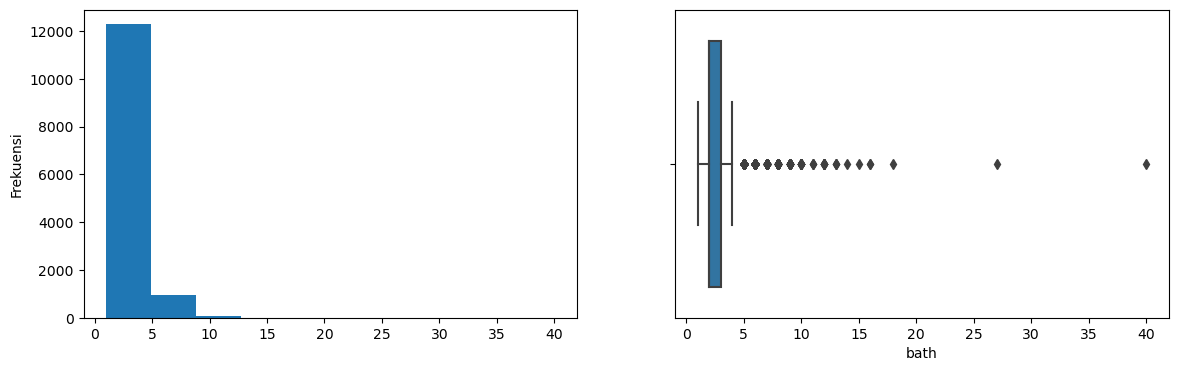

balcony


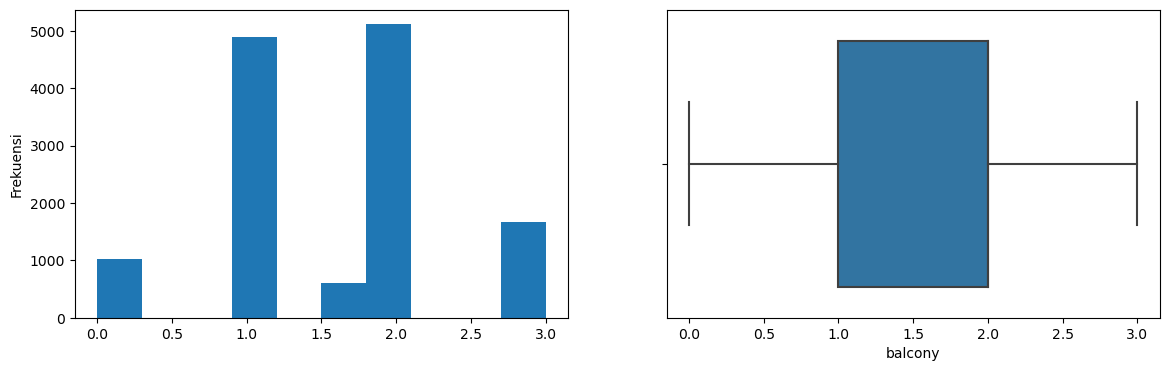

price


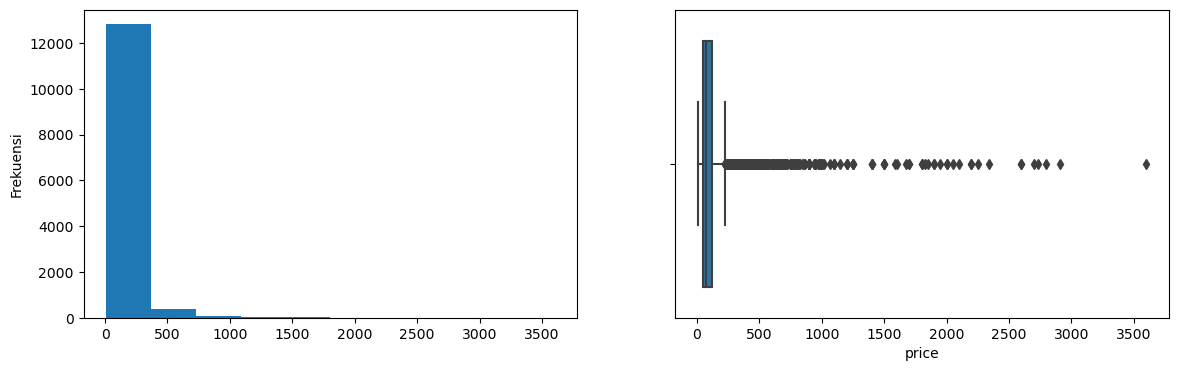

In [42]:
# sebelum penanganan outliers
for kolom in kolom_numerikal:
    print(kolom)
#     print('skew:', round(data_rd[kolom].skew(), 2))
    plt.figure(figsize =(14, 4))
    plt.subplot(1, 2, 1)
    data[kolom].hist(grid=False)
    plt.ylabel('Frekuensi')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_rd[kolom])
    plt.show()

In [43]:
Q1 = data_rd.quantile(0.25)
Q3 = data_rd.quantile(0.75)
IQR = Q3 - Q1
outliers = (data_rd < (Q1 - 1.5 * IQR)) | (data_rd > (Q3 + 1.5 * IQR))
data_rd_out = data_rd[~outliers]

data_rd_out

C:\Users\Bastian Torus\AppData\Local\Temp\ipykernel_6052\882932866.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data_rd < (Q1 - 1.5 * IQR)) | (data_rd > (Q3 + 1.5 * IQR))


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.000000,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,NaN,3.000000,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.000000,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.000000,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.000000,51.00,2.0
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.000000,112.00,3.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.000000,NaN,NaN
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,GrrvaGr,3600,NaN,1.584376,NaN,4.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.000000,60.00,2.0


In [44]:
data_rd_out.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,11759.0,2.413688,0.758050,1.0,2.0,2.0,3.0,4.0
balcony,12791.0,1.582405,0.802846,0.0,1.0,2.0,2.0,3.0
price,11534.0,80.083103,44.079624,8.0,48.0,68.0,100.0,226.5
BHK,11952.0,2.570030,0.765402,1.0,2.0,3.0,3.0,4.0


In [45]:
data_rd_out.describe(include='object').T

,count,unique,top,freq
area_type,12791,4,Super built-up Area,8317
availability,12791,81,Ready To Move,10172
location,12791,1305,Whitefield,524
size,12791,31,2 BHK,4947
society,12791,2688,GrrvaGr,5396
total_sqft,12791,2117,1200,808


In [46]:
data_rd_out['bath'].fillna(data_rd_out['bath'].mean(), inplace=True)
data_rd_out['price'].fillna(data_rd_out['price'].mean(), inplace=True)
data_rd_out['BHK'].fillna(data_rd_out['BHK'].mean(), inplace=True)

In [47]:
data_rd_out.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
BHK             0
dtype: int64

bath


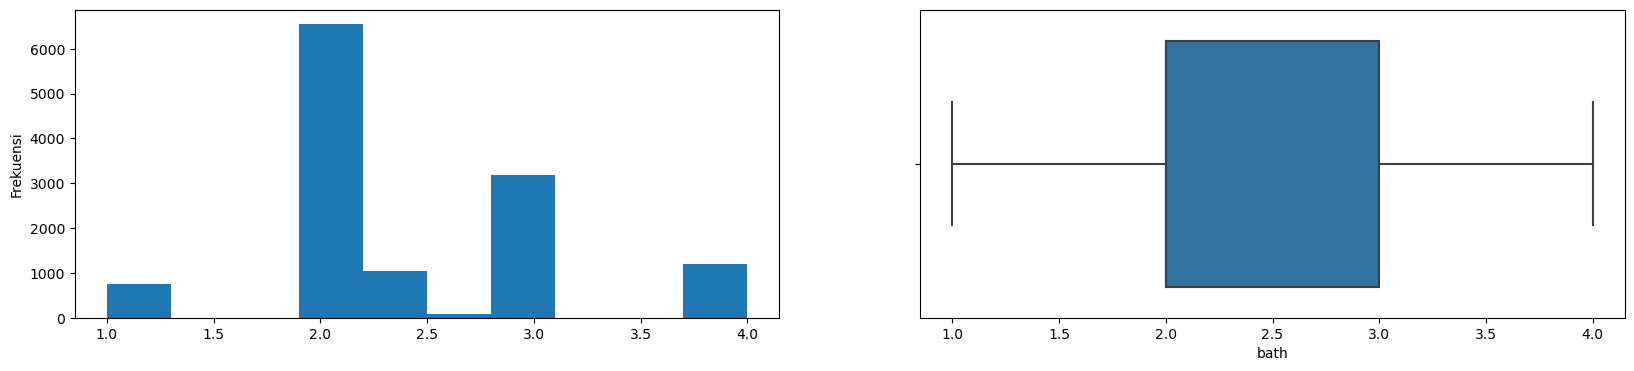

balcony


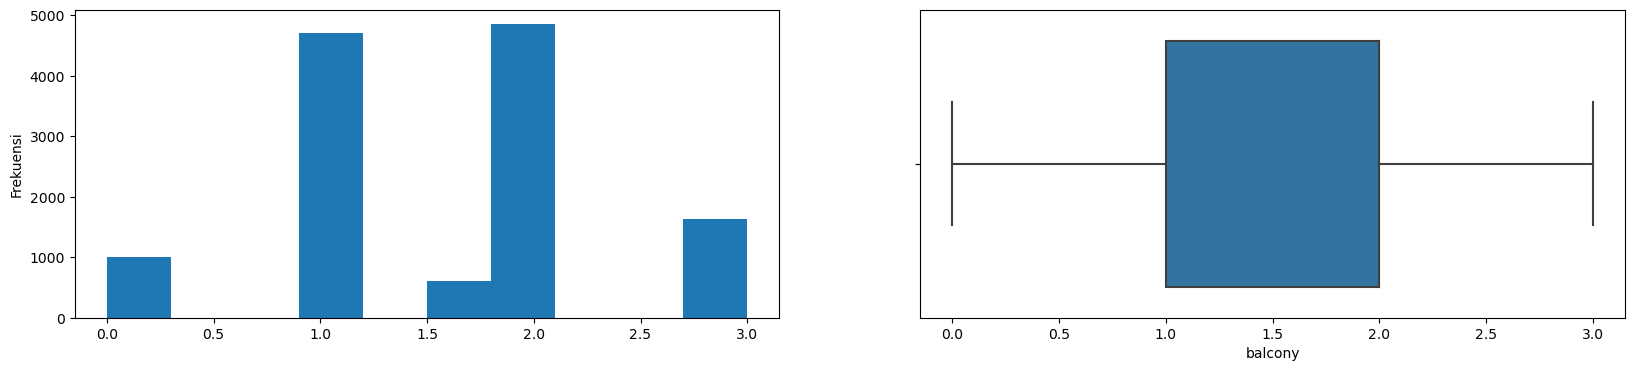

price


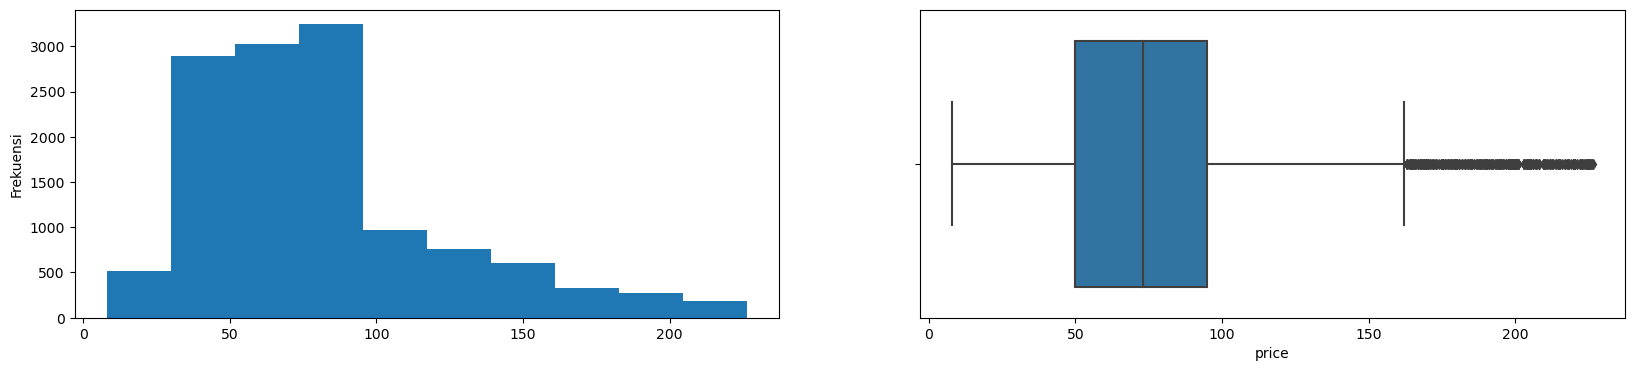

In [48]:
for kolom in kolom_numerikal:
    print(kolom)
#     print('skew:', round(data_rd_out[kolom].skew(), 2))
    plt.figure(figsize =(20, 4))
    plt.subplot(1, 2, 1)
    data_rd_out[kolom].hist(grid=False)
    plt.ylabel('Frekuensi')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_rd_out[kolom])
    plt.show()

Pada tahap ini untuk menghilangkan nilai outlier dengan metode IQR. Pada dua gambar sebelum dilakukan proses hapus outlier dan sesudah hapus oulier dapat menunjukkan pola variabel yang memiliki nilai oulier.

# Exploratory Data Analysis

Tahap ini melakukan analisis secara grafik atau gambar untuk melihat pola data agar lebih mudah dipahami

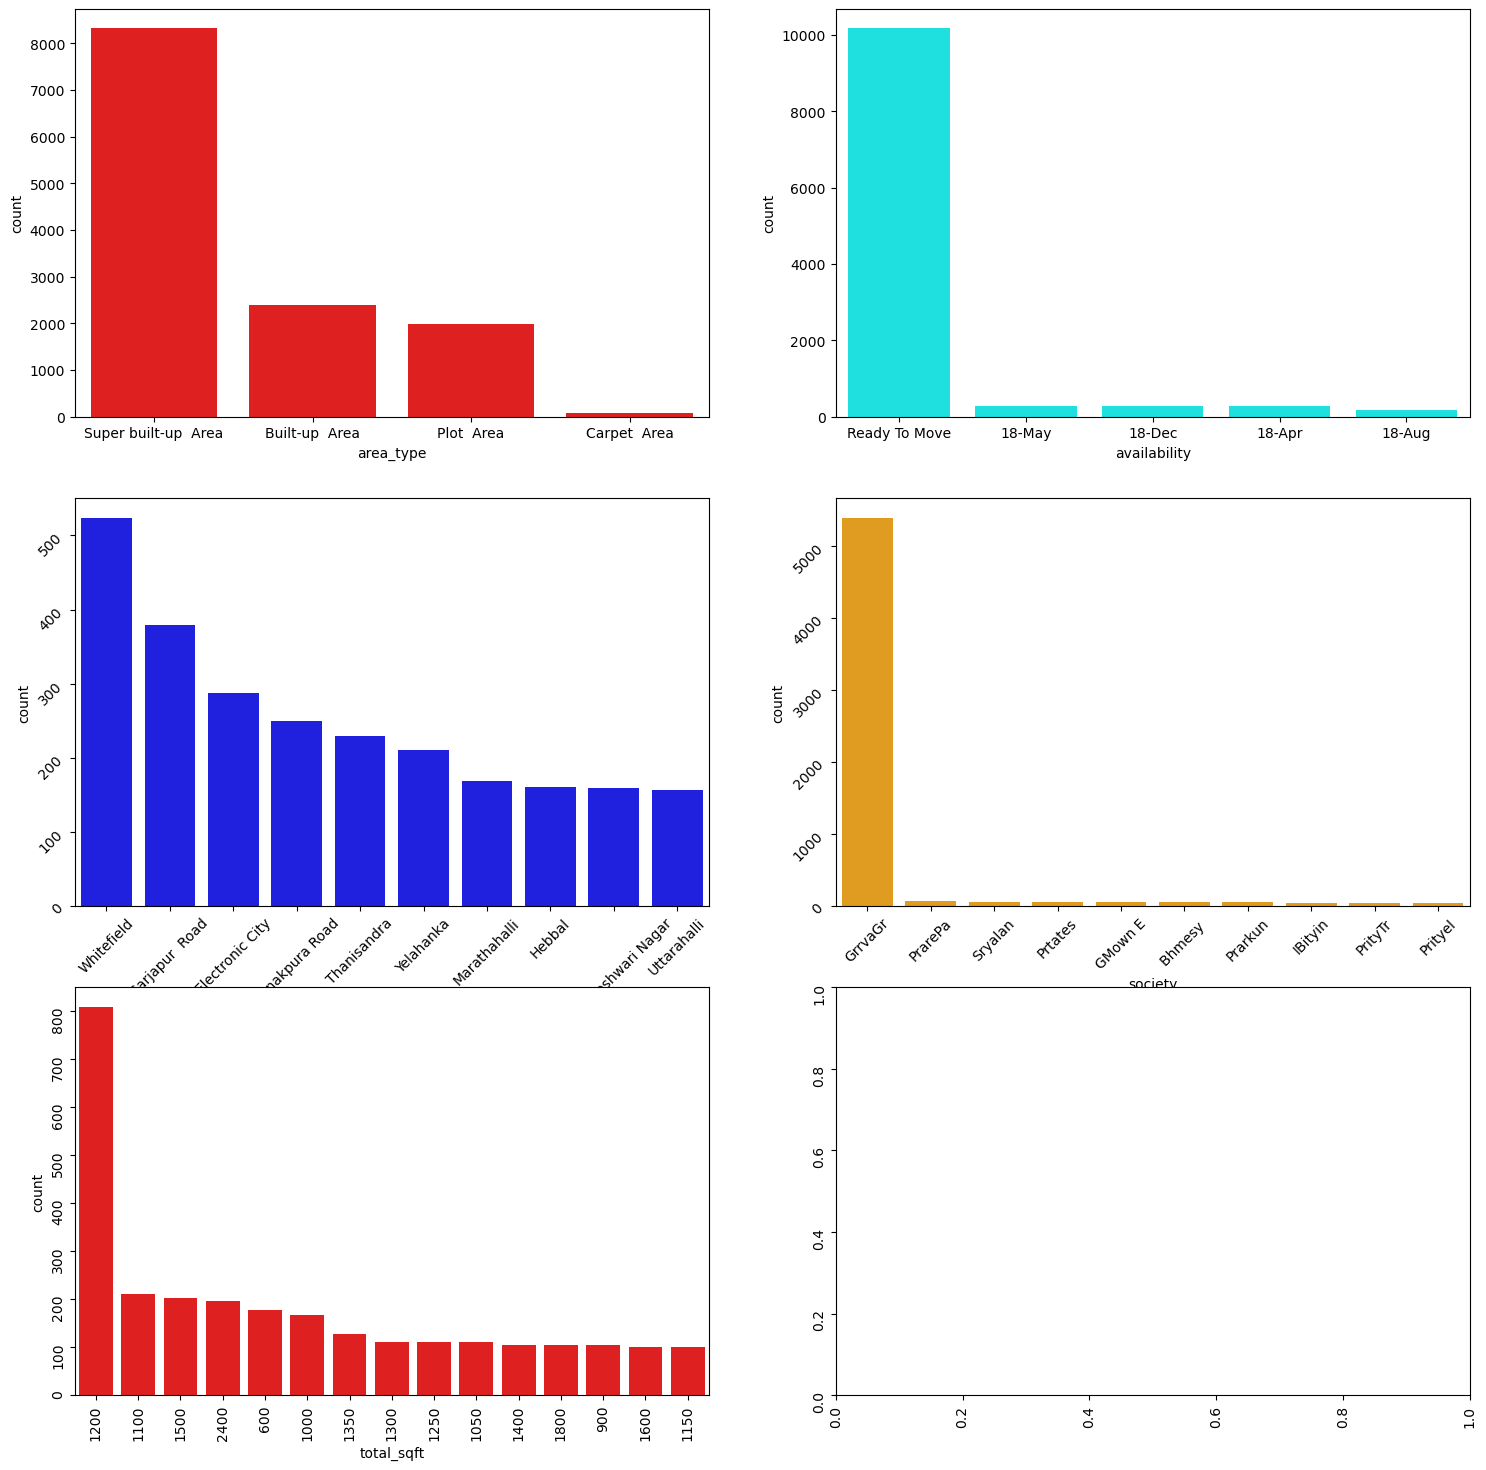

In [49]:
fig, axes = plt.subplots(3, 2, figsize=(18,18))
sns.countplot(ax = axes[0, 0], x = 'area_type', data = data_rd_out, color = 'red',
             order = data_rd_out['area_type'].value_counts().index)


sns.countplot(ax = axes[0, 1], x = 'availability', data=data_rd_out, color = 'cyan',
             order = data_rd_out['availability'].value_counts().head().index)


sns.countplot(ax = axes[1, 0], x = 'location', data = data_rd_out, color='blue',
              order=data_rd_out['location'].value_counts().head(10).index)


sns.countplot(ax = axes[1, 0], x = 'size', data = data_rd_out, color='green',
              order=data_rd_out['location'].value_counts().head(10).index)

sns.countplot(ax=axes[1, 1], x='society', data=data_rd_out, color='orange',
              order=data_rd_out['society'].value_counts().head(10).index)

sns.countplot(ax=axes[2,0], x='total_sqft', data=data_rd_out, color='red',
              order=data_rd_out['total_sqft'].value_counts().head(15).index)

axes[1][1].tick_params(labelrotation=45)
axes[1][0].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=90)
axes[2][1].tick_params(labelrotation=90)

plt.show()

Dari ke-5 plot ini mampu melihat pola perbandingan dari seluruh data dan bisa dilakukan observasi dalam menunjukkan parameter dan memprediksi properti yang terbaik untuk dijual dan memasarkan kepada pelanggan:
* gambar pertama menunjukkan variabel Super built-up Area merupakan tipe area yang terbanyak dipilih atau yang diminati oleh Customer.
* gambar yang kedua menujukkan bahwa Ready To Move atau sudah tersedia rumah yang sudah siap dihuni.
* gambar ketiga menunjukkan pemilihan lokasi terbanyak ada di lokasi Whitefiled.
* gambar keempat menunjukkan GrrvaGr adalah society yang paling banyak diminati.
* gambar kelima menunjukkan luas area atau tanah yang lebih banyak atau dominan dipilih adalah 1200 sqft.

C:\Users\Bastian Torus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


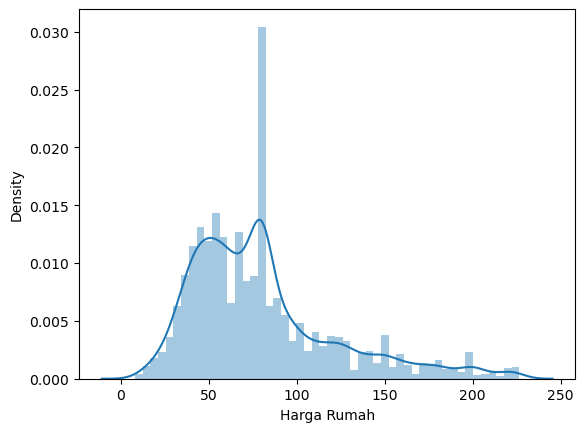

In [50]:
sns.distplot(data_rd_out['price'], axlabel='Harga Rumah')
plt.show()

In [51]:
data_rd_out['availability'].value_counts().head(10)

Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
19-Dec             176
18-Jul             131
18-Mar             130
18-Jun              98
20-Dec              94
Name: availability, dtype: int64

In [82]:
a = data_rd_out['availability'].value_counts()
a = dict(a)
b = list(a.keys())
frequency = list(a.values())
fig = go.Figure()
fig.add_trace(go.Bar(
             y=b[0:10],
             x=frequency[0:10],
             orientation='h',
             name='Top 10 Rumah yang Tersedia',
             marker_color='red',
             text=frequency)
             )
fig.update_traces(textposition='outside')


In [53]:
data_rd_out_ava = data_rd_out['availability'].value_counts().reset_index().head(5)
fig = px.pie(data_rd_out_ava, values='availability', names='index',title='Komposisi Untuk Ketersedian Rumah',hole=.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

* Rumah yang siap dihuni ada sekitar 10172 yang sudah di cek dari keselurahan atau sekitar 90.8%.

In [54]:
data_rd_out['location'].value_counts().head(10)

Whitefield               524
Sarjapur  Road           379
Electronic City          287
Kanakpura Road           249
Thanisandra              229
Yelahanka                210
Marathahalli             169
Hebbal                   161
Raja Rajeshwari Nagar    159
Uttarahalli              157
Name: location, dtype: int64

In [55]:
data_lok = data_rd_out['location'].value_counts()
data_lok = dict(data_lok)
fig = go.Figure()
fig = px.bar(y= list(data_lok.keys())[0:10], 
            x=list(data_lok.values())[0:10],
            text=list(data_lok.values())[0:10],
            orientation='h',
            color=list(data_lok.values())[0:10],
            color_continuous_scale = 'Rainbow',
            title='Perbandingan Jumlah location Rumah')
fig.show()

In [56]:
data_rd_out_lok = data_rd_out['location'].value_counts().reset_index().head()
fig = px.pie(data_rd_out_lok, values='location', names='index',title='Komposisi Untuk Ketersedian Lokasi',hole=.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

* Pemilihan lokasi yang paling banyak dilih ada di whitefield sekitar 31.4% dan di Sarjapur Road sekitar 22.7%

In [57]:
data_rd_out['price'].value_counts().head(10)

80.083103    1257
75.000000     300
65.000000     296
55.000000     265
60.000000     263
45.000000     231
50.000000     225
70.000000     208
90.000000     199
85.000000     192
Name: price, dtype: int64

In [58]:
data_price = data_rd_out['price'].value_counts()
data_price = dict(data_price)
fig = go.Figure()
fig = px.bar(y=list(data_price.keys())[0:10], 
            x=list(data_price.values())[0:10],
            text=list(data_price.values())[0:10],
            orientation='h',
            color=list(data_price.values())[0:10],
            color_continuous_scale = 'spectral',
            title='Perbandingan Harga Rumah')

fig.show()

In [59]:
data_rd_out_har = data_rd_out['price'].value_counts().reset_index().head()
fig = px.pie(data_rd_out_har, values='price', names='index',title='Komposisi Untuk Ketersedian Harga',hole=.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

* Untuk harga Rumah terbanyak yang dipilih oleh pelanggan adalah harga 80 dengan 52.8% persentasi yang dimiliki.

In [60]:
data_rd_out['area_type'].value_counts().head(10)

Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: area_type, dtype: int64

In [61]:
data_areatype = data_rd_out['area_type'].value_counts()
data_areatype = dict(data_areatype)
fig = go.Figure()
fig = px.bar(y= list(data_areatype.keys())[0:5], 
            x=list(data_areatype.values())[0:5],
            text=list(data_areatype.values())[0:5],
            orientation='h',
            color=list(data_areatype.values())[0:5],
            color_continuous_scale = 'hsv',
            title='Perbandingan Jumlah Area dan Type Rumah')
fig.show()

In [62]:
data_rd_out_area = data_rd_out['area_type'].value_counts().reset_index().head()
fig = px.pie(data_rd_out_area, values='area_type', names='index',title='Komposisi Untuk Tipe Rumah',hole=.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

* Untuk tipe rumah terbanyak yang dipilih oleh pelanggan adalah tipe rumah yang Super built-up area dengan 65% persentasi yang dimiliki.

In [63]:
data_rd_out['price'].value_counts().head(30)

80.083103     1257
75.000000      300
65.000000      296
55.000000      265
60.000000      263
45.000000      231
50.000000      225
70.000000      208
90.000000      199
85.000000      192
110.000000     182
80.000000      181
150.000000     176
95.000000      174
100.000000     172
120.000000     166
40.000000      164
125.000000     158
130.000000     131
58.000000      129
48.000000      125
35.000000      121
42.000000      115
52.000000      111
115.000000     110
140.000000     108
68.000000      108
160.000000     103
62.000000      102
200.000000     102
Name: price, dtype: int64

In [64]:
aa = data_rd_out.groupby('area_type')['price'].aggregate('mean').reset_index()
fig = go.Figure() 
fig.add_trace(go.Scatter(x=aa['area_type'].tolist(), 
                         y=aa['price'].tolist(),
                         line = dict(color='gold'),
                         mode='lines+markers'))
fig.show()

* Dari pola line chart ini dapat dilihat bahwa tipe area rumah di Plot area memiliki harga yang termahal dengan harga sekitar 105. 
* Sedangkan tipe area rumah Super built-up Area memiliki harga termurah dengan harga  sekitar 77.
* Jika dilihat kembali area tipe Super built-up Area adalah tipe area rumah yang paling banyak diminati pelanggan atau sebanyak 65% dikarenakan area tipe rumah yang termurah untuk dihuni, sedangkan Plot Area adalah area yang termahal dengan peminat sebanyak 15.5%

In [65]:
data_rd_out['location'].value_counts().head(20)

Whitefield                  524
Sarjapur  Road              379
Electronic City             287
Kanakpura Road              249
Thanisandra                 229
Yelahanka                   210
Marathahalli                169
Hebbal                      161
Raja Rajeshwari Nagar       159
Uttarahalli                 157
Hennur Road                 149
Bannerghatta Road           149
7th Phase JP Nagar          135
Electronic City Phase II    128
Rajaji Nagar                107
Haralur Road                102
Bellandur                    93
KR Puram                     91
Hoodi                        88
Electronics City Phase 1     88
Name: location, dtype: int64

In [66]:
bb = data_rd_out.groupby('location')['price'].aggregate('mean').reset_index().head(20)
fig = go.Figure() 
fig.add_trace(go.Scatter(x=bb['location'].tolist(), 
                         y=bb['price'].tolist(),
                         line = dict(color='gold'),
                         mode='lines+markers'))
fig.show()

* Selain area tipe rumah, lokasi juga menentukan perbandingan harga rumah di Bangalore. Dari bar chart dapat dilihat bahwa lokasi whitefield merupakan lokasi terbanyak pelanggan atau 31.4 %. 
* Sama dengan area tipe Super built-up Area yang paling banyak diminati, lokasi whitefield juga banyak diminati karena harga relatif terjangkau oleh pelanggan. Lokasi di whitefield memiliki harga sekitar 45.
* Untuk lokasi dengan harga termahal yaitu di 12th cross srinivas nagar banshankari 3rd stage dengan harga sekitar 200.

In [67]:
cc = data_rd_out.groupby('total_sqft')['price'].aggregate('mean').reset_index().head(45)
fig = go.Figure() 
fig.add_trace(go.Scatter(x=cc['total_sqft'].tolist(), 
                         y=cc['price'].tolist(),
                         line = dict(color='gold'),
                         mode='lines+markers'))
fig.update_layout(xaxis_tickangle=45)
fig.show()

In [68]:
data_rd_out_area = data_rd_out['total_sqft'].value_counts().reset_index().head()
fig = px.pie(data_rd_out_area, values='total_sqft', names='index',title='Komposisi Untuk Luas Tanah Rumah du bangalore',hole=.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

* selain area tipe dan lokasi, luas tanah juga menentukan harga rumah di Bangalore. Dapat dilihat bahwa luas tanah 1.25Acres merupakan yang termahal dengan harga luas tanah sekitar 200.
* sedangkan luas tanah 1200 merupakan paling banyak dicari pelanggan sekitar 50.7%. Hal ini mungkin sama dengan lokasi dan area tipe faktor yang menentukan banyaknya rumah di bangalore adalah cukup terjangkau untuk dibeli.

In [69]:
dd = data_rd_out.loc[data_rd_out['availability']=='Ready To Move']
fig = go.Figure()
fig.add_trace(go.Scatter(x=dd['total_sqft'].values.tolist(),
                        y=dd['price']. values.tolist(),
                        mode='markers'))
fig.show()

In [70]:
ee = data_rd_out.loc[data_rd_out['availability']=='18-May']
fig = go.Figure()
fig.add_trace(go.Scatter(x=ee['total_sqft'].values.tolist(),
                        y=ee['price']. values.tolist(),
                        mode='markers'))
fig.show()

In [71]:
ff = data_rd_out.loc[data_rd_out['availability']=='18-Dec']
fig = go.Figure()
fig.add_trace(go.Scatter(x=ff['total_sqft'].values.tolist(),
                        y=ff['price']. values.tolist(),
                        mode='markers'))
fig.show()

In [72]:
gg = data_rd_out.loc[data_rd_out['availability']=='18-Apr']
fig = go.Figure()
fig.add_trace(go.Scatter(x=gg['total_sqft'].values.tolist(),
                        y=gg['price']. values.tolist(),
                        mode='markers'))
fig.show()

In [73]:
hh = data_rd_out.loc[data_rd_out['availability']=='18-Jul']
fig = go.Figure()
fig.add_trace(go.Scatter(x=hh['total_sqft'].values.tolist(),
                        y=hh['price']. values.tolist(),
                        mode='markers'))
fig.show()

In [74]:
ii = data_rd_out.loc[data_rd_out['availability']=='19-Dec']
fig = go.Figure()
fig.add_trace(go.Scatter(x=ii['total_sqft'].values.tolist(),
                        y=ii['price']. values.tolist(),
                        mode='markers'))
fig.show()

Dari plot scatter ini menentukan persebaran dan komposisi dari index availability secara menyeluruh. Dapat dilihat bahwa jumlah distribusi dan komposisi terbanyak ada pada Ready To Move dengan 90.8% memilih harga rumah terbanyak ada di range 20 - 100 dengan luas tanah 4200, 1007, 2010, 2600 sqft yang pasti lebih terjangkau. Sedangkan untuk index availability memiliki pola menyebar dengan arti pilihan yang bervariasi.

In [75]:
jj = data_rd_out.loc[data_rd_out['area_type']=='Super built-up  Area']
fig = go.Figure()
fig.add_trace(go.Scatter(x=jj['total_sqft'].values.tolist(),
                        y=jj['price']. values.tolist(),
                        mode='markers'))
fig.show()

Dari plot scatter ini menentukan persebaran dan komposisi dari index area_type secara menyeluruh. Dapat dilihat bahwa jumlah distribusi dan komposisi terbanyak ada pada Super Built-up Area dengan persentase 65% memilih harga rumah terbanyak ada di range 20 - 100 dengan luas tanah 1062, 1208, 1847, 1110, 1152, 1530, 1459, 1056 sqft yang pasti lebih terjangkau. 

In [76]:
kk = data_rd_out.loc[data_rd_out['area_type']=='Built-up  Area']
fig = go.Figure()
fig.add_trace(go.Scatter(x=kk['total_sqft'].values.tolist(),
                        y=kk['price']. values.tolist(),
                        mode='markers'))
fig.show()

Dari plot scatter ini menentukan persebaran dan komposisi dari index area_type secara menyeluruh. Dapat dilihat bahwa jumlah distribusi dan komposisi Built-up Area dengan persentase 18.7% memilih harga rumah terbanyak ada di range 50 - 200 dengan luas tanah 4395, 2600 sqft yang pasti lebih terjangkau. 

In [77]:
ll = data_rd_out.loc[data_rd_out['area_type']=='Plot  Area']
fig = go.Figure()
fig.add_trace(go.Scatter(x=ll['total_sqft'].values.tolist(),
                        y=ll['price']. values.tolist(),
                        mode='markers'))
fig.show()

Dari plot scatter ini menentukan persebaran dan komposisi dari index area_type secara menyeluruh. Dapat dilihat bahwa jumlah distribusi dan komposisi Plot Area sebagai area tpe rumah yang paling mahal dengan persentase 15.5% memilih harga rumah terbanyak ada di range 70 - 200 dengan luas tanah 4395, 2600 sqft yang pasti lebih terjangkau.

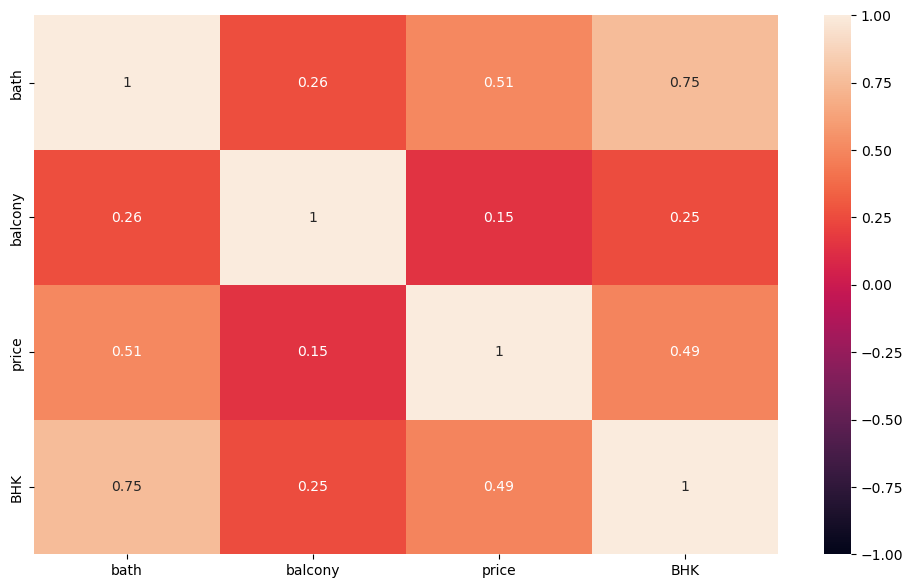

In [78]:
plt.figure(figsize=(12,7))
sns.heatmap(data_rd_out.drop(['size'], axis=1).corr(), annot=True, vmin=-1, vmax=1)
plt.show()

* bath memiliki korelasi yang kuat dengan BHK yaitu 0.75
* price memiliki korelasi sebasar 0.49 dengan BHK dan korelasi sebesar 0.51 dengan bath
* rumah yang memiliki bath dan BHK aspek yang dipertimbangkan untuk menentukan minat pelanggan untuk membeli properti rumah di Bangalore. Pelanggan akan memilih harga rumah yang murah dengan perlengkapan properti didalam rumah seperti Bedroom, Hall, and Kitchen (BHK) dan bath. Hal ini masuk akal sebab rumah dengan properti rumah yang lengkap dengan lokasi yang baik dan area_type rumah yang mereka butuhkan dalam membeli rumah.